In [2]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sklearn
import pydotplus
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split 
from IPython.display import Image, display

In [3]:
# Get the data for analysis

url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.shape

(891, 12)

In [7]:
# Find the null values 

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_new = titanic[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
titanic_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# There are 177 Nulls in the Age category. Fill them with the mean Age - 30.0

titanic_new=titanic_new.fillna(30.0)

In [11]:
# Check for nulls 

titanic_new.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [12]:
titanic_new.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [13]:
# Change the Male and Female values to numerics

titanic_new['Sex'] = pd.get_dummies(titanic_new['Sex'])
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


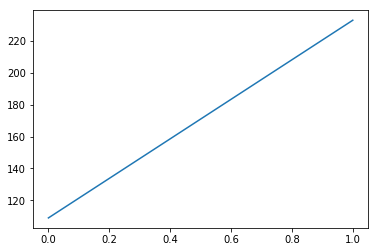

In [14]:
# Show the survival numbers based on Gender

Gendergrp=titanic_new.groupby(['Sex']).sum()
plt.plot(Gendergrp['Survived'])

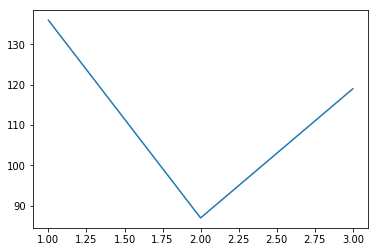

In [15]:
# Show the survival numbers based on Pclass

Pclassgrp=titanic_new.groupby(['Pclass']).sum()
plt.plot(Pclassgrp['Survived'])

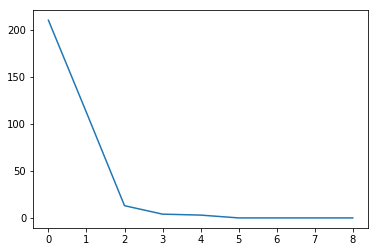

In [16]:
# Show the survival numbers based on SibSp

SibSpgrp=titanic_new.groupby(['SibSp']).sum()
plt.plot(SibSpgrp['Survived'])

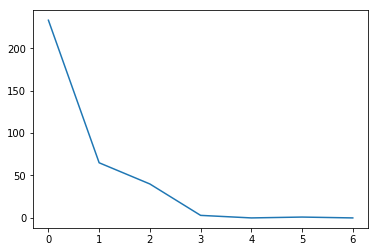

In [17]:
# Show the survival numbers based on Parch

Parchgrp=titanic_new.groupby(['Parch']).sum()
plt.plot(Parchgrp['Survived'])

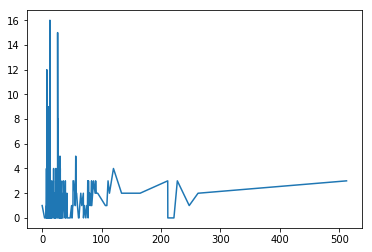

In [18]:
# Show the survival numbers based on Fare

Faregrp=titanic_new.groupby(['Fare']).sum()
plt.plot(Faregrp['Survived'])

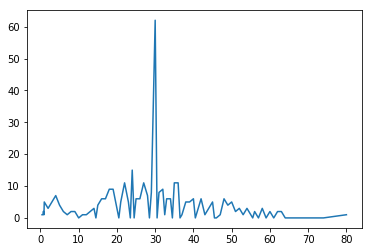

In [19]:
# Show the survival numbers based on Age

Agegrp=titanic_new.groupby(['Age']).sum()
plt.plot(Agegrp['Survived'])

In [20]:
# Create test and train data from the dataset

X = titanic_new[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_new['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [21]:
# Train the decision tree

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
# Use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

In [23]:
# Check the performance of the model
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 32
Accuracy: 0.82


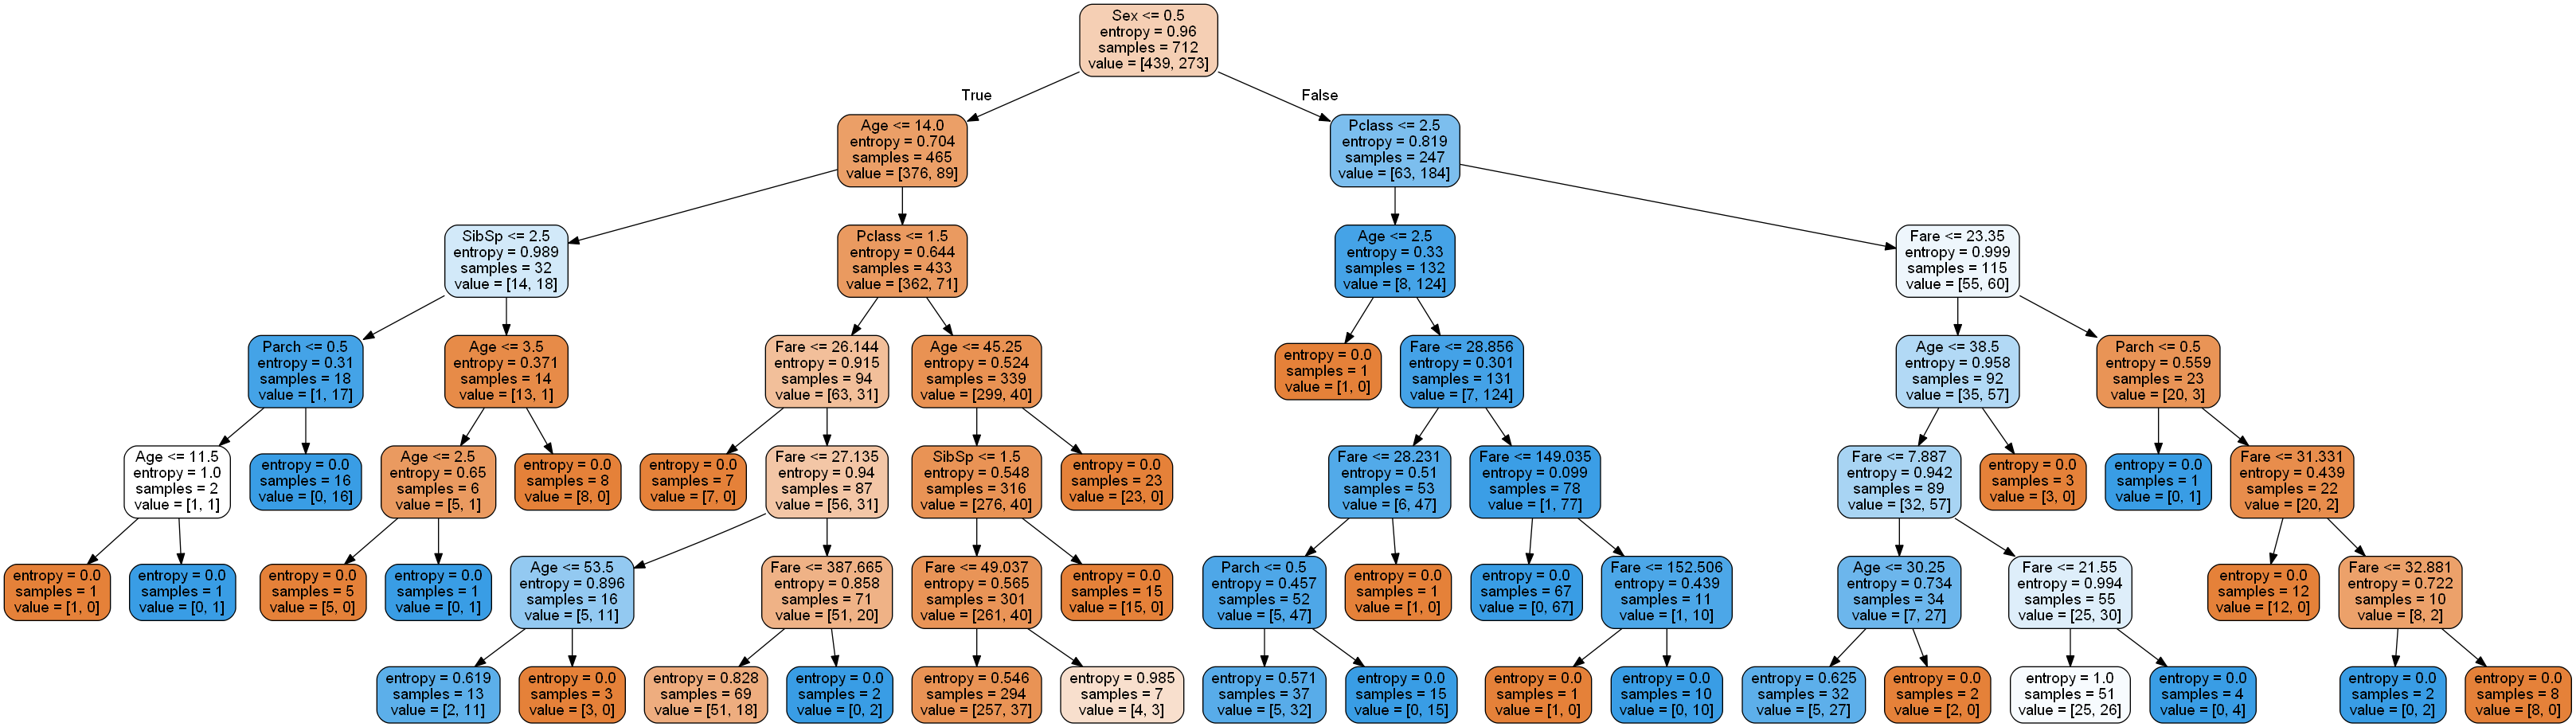

In [24]:
# Visualize how the tree splits the data 

dot_data = tree.export_graphviz(dtree,
                                out_file=None, 
                                filled=True, 
                                rounded=True, 
                                feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'])
graph = pydotplus.graph_from_dot_data(dot_data)  

display(Image(graph.create_png()))